# CS 3540/CS 5540/CMPE 5990/CSYS 5990
### HW6 (Lasso vs Ridge, Data Batching, Gadient-Optimizers)

* Note 1: **Please print (or plot, when asked) all solutions.**
* Note 2: **If asked to explain something, record your answer as a docstring, then print it.**

Please submit all assigments as <b>firstname_lastname_HWX.ipynb (where X is the HW number).</b>

---

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
import tensorflow as tf

### Question 1 (Lasso and Ridge Regression)

Here, we solve linear regression, but we want to **regularize** with ridge regression, lasso, and elastic net.

In [12]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# load and splid the data
X, Y = load_diabetes(return_X_y=True)
training_ind = round(0.8*len(Y))

Xtrain = X[0:training_ind,:]
Ytrain = Y[0:training_ind]

Xtest = X[training_ind:,:]
Ytest = Y[training_ind:]


**Tasks:**

1. Use ``linear_model.Ridge`` for $\alpha$ = 0.001, 0.01, 0.1, 1, and 10
    * Compute the test data loss for each $\alpha$, and plot them
    * use ``loss = sum((Ytest - model.predict(Xtest))**2)``
2. Use ``linear_model.Lasso`` for $\alpha$ = 0.001, 0.01, 0.1, 1, and 10
    * Compute the test data loss for each $\alpha$, and plot them
    * Also, comment on how many model coefficients are 0 for each $\alpha$
3. Use ``linear_model.ElasticNet`` for $\alpha$ = 1.0 and ``l1_ratio``= 0.1, 0.5, and 0.9
    * Compute the test data loss for each $\alpha$, and plot them


In [13]:
# your code here

### Question 2 (Data Batching)

As in class, we are going to compare gradient descent routines when data is **batched** in different ways: (1) full batch, (2) mini batch, and (3) stochastic gradient descent. We will also experiment with step size decay. We will deal with normalized data. **Therefore, there is no need to include a bias terms in the problem.**

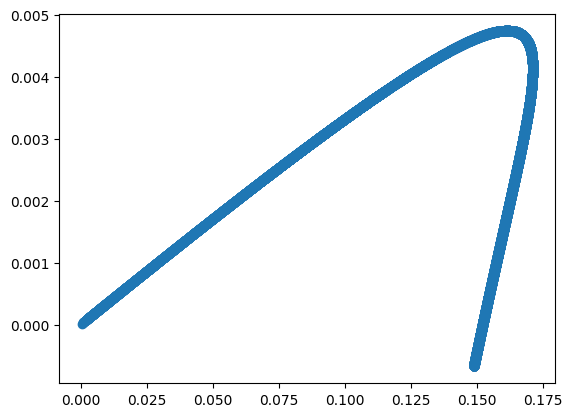

In [15]:
from numpy import genfromtxt
wine_data  = genfromtxt('./winequality-white.csv', delimiter=';', skip_header=1)

# parse the data
X = wine_data[:,0:11]
y = wine_data[:,11]
y = np.reshape(y, (len(y),1))

# example code -- no normalization or step decay! full batch
iterations = 50000
w = np.zeros((11,1))
w1 = np.zeros((iterations,1))
w2 = np.zeros((iterations,1))
for ii in range(0,iterations):
    grad_w = 2*X.T@(X@w - y)
    w = w - 0.000000001*grad_w # eta, why so (serious, jk) small?
    w1[ii] = w[0]
    w2[ii] = w[1]

plt.scatter(w1,w2, linestyle='-')


**Tasks:**

*Remember to use the Mean Squared Error (MSE) for loss for this question!*
1. Normalize the data! That is, subtract the mean from all input and output features, and divide each feature by its standard deviation. When you do this, there is no need to include a bias term in the least squares formulation.
2. Use gradient descent with **full batch**
    * find a good value for $\eta$
    * experiment with step decay, and find a good decay rate (0 < decay < 1)
    * plot the loss function over iterations

3. Use gradient descent with **mini-batch** (cycle over 12 batches)
    * experiment with step decay, and find a good decay rate (0 < decay < 1)
    * plot the loss function

4. Use gradient descent with **stochastic gradient descent** (randomly)
    * experiment with step decay, and find a good decay rate (0 < decay < 1)
    * plot the loss function


In [16]:
# your code here

### Question 3 (Gradient Descent Routines)

The goal here is to compare vanilla gradient descent with 5 other alternatives learned in class. We will use the mean squared error loss function, and we will deal with normalized data. **Therefore, there is no need to include a bias terms in the problem.**

\begin{align}
\min_{w} \;\frac{1}{n}\,\bigl(y - Xw\bigr)^\top \bigl(y - Xw\bigr)
\end{align}





In [21]:
from numpy import genfromtxt
wine_data  = genfromtxt('./winequality-white.csv', delimiter=';', skip_header=1)

# parse the data
X = wine_data[:,0:11]
y = wine_data[:,11]
y = np.reshape(y, (len(y),1))

Using a reasonable step size and decay rate, test the following optimziation algorithms. Please code them up from scratch! Tinker with them until the converge.

**Tasks:**
1. Again, normalize the data! That is, subtract the mean from all input and output features, and divide each feature by its standard deviation. When you do this, there is no need to include a bias term in the least squares formulation.
2. Code and test Momentum Gradient Descent. Plot the loss function over iterations.
3. Code and test NAG. Plot the loss function over iterations.
4. Code and test AdaGrad. Plot the loss function over iterations.
5. Code and test RMSProp. Plot the loss function over iterations.
6. Code and test Adam. Plot the loss function over iterations.

In [22]:
# your code here